<a href="https://colab.research.google.com/github/patel-priyal-m/parkinsons-desiese-detection/blob/main/adt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Import

In [ ]:
import os

!git clone https://github.com/patel-priyal-m/parkinsons-desiese-detection.git
os.chdir('parkinsons-desiese-detection')

print(os.listdir())

fatal: destination path 'parkinsons-desiese-detection' already exists and is not an empty directory.
['adt.ipynb', 'new_dataset.csv', 'Data', '.git', 'parkinsons-desiese-detection', 'ImgNew.ipynb', 'README.md', 'image.ipynb']


In [ ]:

import pandas as pd
df = pd.read_csv('Data/Sleep_Efficiency.csv')


#Explainatory Analysis

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Describe dataset
print("## Dataframe Information")
print(df.info())



## Dataframe Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     436 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequenc

In [ ]:
print("\n## Summary Statistics")
print(df.describe())


## Summary Statistics
               ID         Age  Sleep duration  Sleep efficiency  \
count  452.000000  452.000000      452.000000        452.000000   
mean   226.500000   40.285398        7.465708          0.788916   
std    130.625419   13.172250        0.866625          0.135237   
min      1.000000    9.000000        5.000000          0.500000   
25%    113.750000   29.000000        7.000000          0.697500   
50%    226.500000   40.000000        7.500000          0.820000   
75%    339.250000   52.000000        8.000000          0.900000   
max    452.000000   69.000000       10.000000          0.990000   

       REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
count            452.000000             452.000000              452.000000   
mean              23.002212              52.960177               24.831858   
std                3.972466              15.561713               15.150774   
min               15.000000              20.000000           

In [ ]:

print("\n## Missing Values Count")
print(df.isnull().sum())


## Missing Values Count
ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       16
Smoking status             0
Exercise frequency         6
dtype: int64


In [ ]:
# Check for missing values
print(df.isnull().sum())


ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       16
Smoking status             0
Exercise frequency         6
dtype: int64


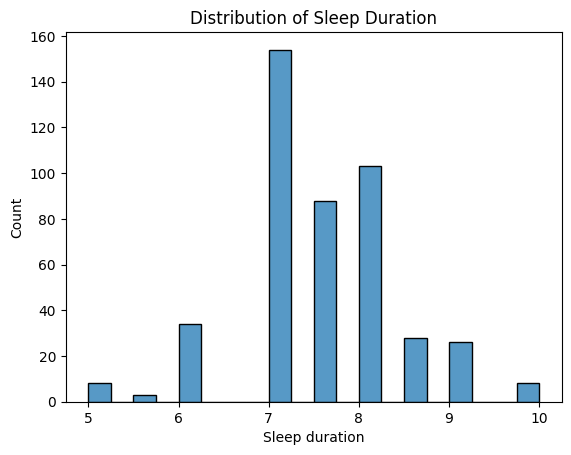

In [ ]:
# Explore the distribution of numerical variables
sns.histplot(df['Sleep duration'])
plt.title('Distribution of Sleep Duration')
plt.show()

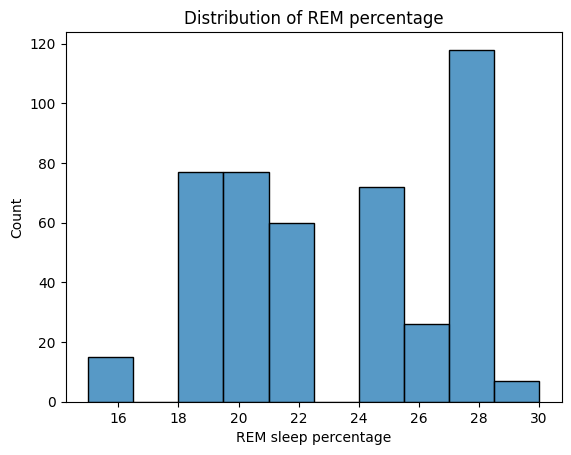

In [ ]:
# Explore the distribution of numerical variables
sns.histplot(df['REM sleep percentage'])
plt.title('Distribution of REM percentage')
plt.show()

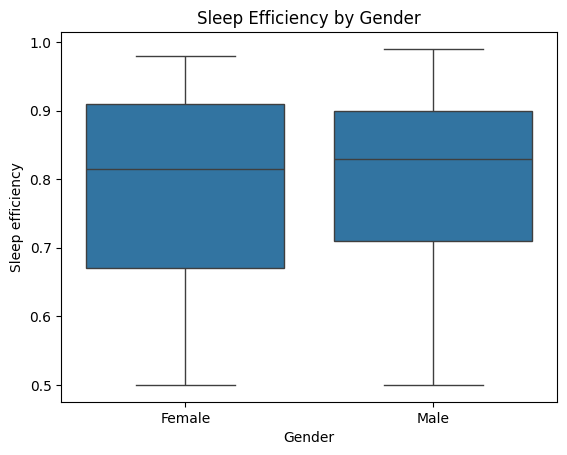

In [ ]:
sns.boxplot(x='Gender', y='Sleep efficiency', data=df)
plt.title('Sleep Efficiency by Gender')
plt.show()


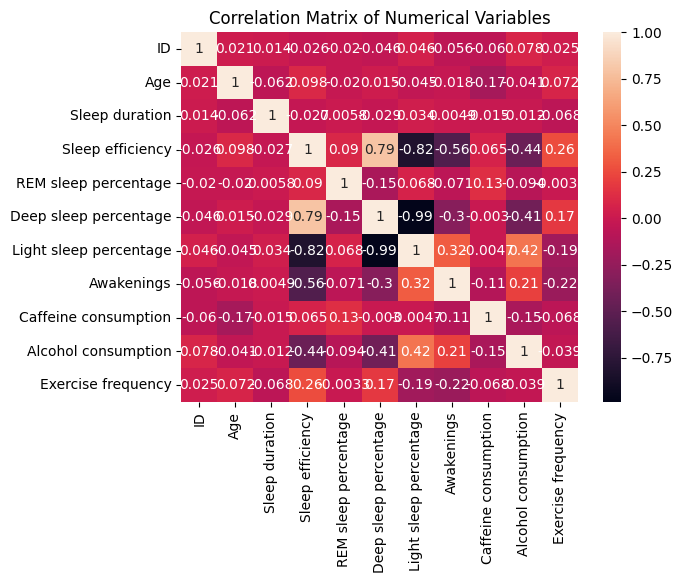

In [ ]:
# Calculate correlations between variables, excluding non-numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()  # Select only numerical columns
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])


In [ ]:
# Calculate correlations with 'REM' for numerical columns
rem_correlations = numerical_df.corr()['REM sleep percentage'].sort_values(ascending=False)
print(rem_correlations)

REM sleep percentage      1.000000
Caffeine consumption      0.125853
Sleep efficiency          0.090021
Light sleep percentage    0.067830
Sleep duration            0.005819
Exercise frequency       -0.003304
ID                       -0.019782
Age                      -0.020479
Awakenings               -0.070615
Alcohol consumption      -0.093899
Deep sleep percentage    -0.148563
Name: REM sleep percentage, dtype: float64


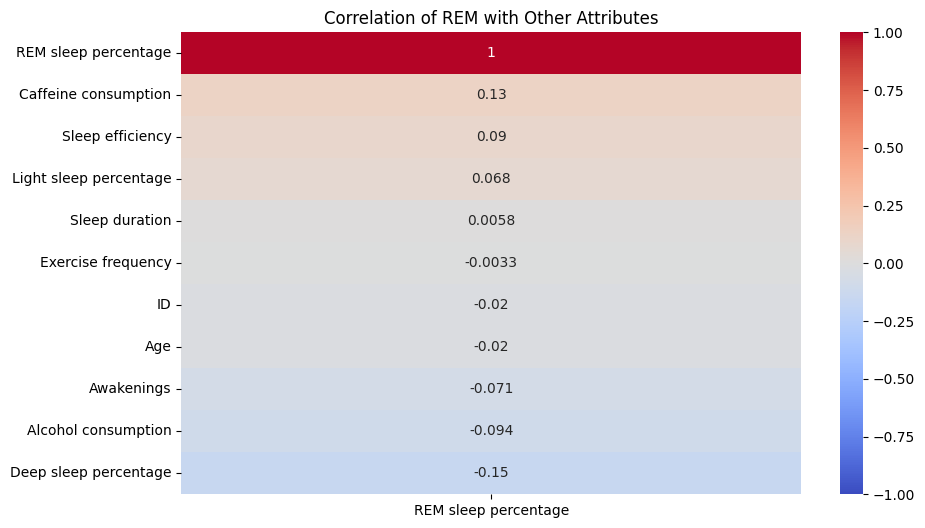

In [ ]:
# Create a heatmap for 'REM' correlations (using numerical_df)
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr()[['REM sleep percentage']].sort_values(by='REM sleep percentage', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of REM with Other Attributes')
plt.show()

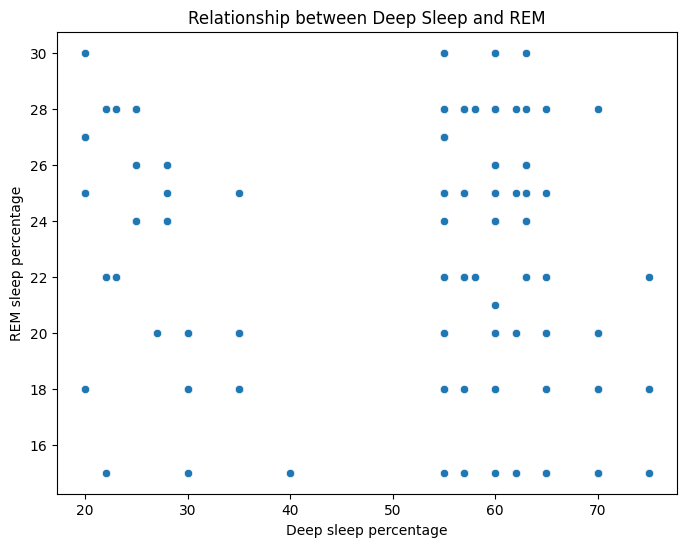

In [ ]:
# Further analysis based on correlations:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Deep sleep percentage', y='REM sleep percentage', data=df)
plt.title('Relationship between Deep Sleep and REM')
plt.xlabel('Deep sleep percentage')
plt.ylabel('REM sleep percentage')
plt.show()

# K-Means clusternig to identify cluster of our interest


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import imputer to handle missing values


# Select numerical features for clustering (excluding target variable if any)
features_for_clustering = df.select_dtypes(include=['number'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
features_for_clustering_imputed = imputer.fit_transform(features_for_clustering)

# Standardize the feature
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering_imputed)

# Perform K-means clustering for different values of k
k_values = [2, 3, 4, 5]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    df[f'Cluster_{k}'] = kmeans.labels_
    print(f"Clustering results for k = {k}:")
    print(df[f'Cluster_{k}'].value_counts())



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Clustering results for k = 2:
Cluster_2
0    339
1    113
Name: count, dtype: int64
Clustering results for k = 3:
Cluster_3
1    231
2    113
0    108
Name: count, dtype: int64
Clustering results for k = 4:
Cluster_4
0    121
2    119
1    113
3     99
Name: count, dtype: int64
Clustering results for k = 5:
Cluster_5
3    113
1    111
4     83
0     75
2     70
Name: count, dtype: int64


identifying interesting clusters

In [ ]:
# make and identify a cluster that has 'REM sleep percentage' and have negative corelation with 'Caffeine consumption' and/or positive co-relation with 'Alcohol consumption' and rem is high
# or no corelation with any of these but still rem is high
# try with several k values ranginig from 3 to 20

# Handle missing values in relevant columns
imputer = SimpleImputer(strategy='mean')
df['REM sleep percentage'] = imputer.fit_transform(df[['REM sleep percentage']])
df['Caffeine consumption'] = imputer.fit_transform(df[['Caffeine consumption']])
df['Alcohol consumption'] = imputer.fit_transform(df[['Alcohol consumption']])

# Standardize relevant features
scaler = StandardScaler()
df['REM_scaled'] = scaler.fit_transform(df[['REM sleep percentage']])
df['Caffeine_scaled'] = scaler.fit_transform(df[['Caffeine consumption']])
df['Alcohol_scaled'] = scaler.fit_transform(df[['Alcohol consumption']])

# K-means clustering for different values of k
k_values = range(3, 21)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['REM_scaled', 'Caffeine_scaled', 'Alcohol_scaled']])
    df[f'Cluster_{k}'] = kmeans.labels_

    # Analyze clusters for desired characteristics
    for cluster in range(k):
        cluster_data = df[df[f'Cluster_{k}'] == cluster]
        mean_rem = cluster_data['REM sleep percentage'].mean()
        corr_caffeine = cluster_data['REM_scaled'].corr(cluster_data['Caffeine_scaled'])
        corr_alcohol = cluster_data['REM_scaled'].corr(cluster_data['Alcohol_scaled'])

        if (
            (corr_caffeine < -0.2 and mean_rem > df['REM sleep percentage'].mean())  # Negative correlation with caffeine and high REM
            or (corr_alcohol > 0.2 and mean_rem > df['REM sleep percentage'].mean())  # Positive correlation with alcohol and high REM
            or (abs(corr_caffeine) < 0.1 and abs(corr_alcohol) < 0.1 and mean_rem > df['REM sleep percentage'].mean())  # No strong correlation but high REM
        ):
            print(f"\nPotential cluster found for k={k}, cluster={cluster}:")
            print(f"  Mean REM sleep percentage: {mean_rem:.2f}%")
            print(f"  Correlation with Caffeine: {corr_caffeine:.2f}")
            print(f"  Correlation with Alcohol: {corr_alcohol:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Potential cluster found for k=3, cluster=0:
  Mean REM sleep percentage: 26.32%
  Correlation with Caffeine: -0.43
  Correlation with Alcohol: -0.09


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Potential cluster found for k=4, cluster=0:
  Mean REM sleep percentage: 25.92%
  Correlation with Caffeine: -0.42
  Correlation with Alcohol: -0.04

Potential cluster found for k=5, cluster=0:
  Mean REM sleep percentage: 26.11%
  Correlation with Caffeine: -0.45
  Correlation with Alcohol: -0.09

Potential cluster found for k=6, cluster=1:
  Mean REM sleep percentage: 26.02%
  Correlation with Caffeine: -0.44
  Correlation with Alcohol: -0.22


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Potential cluster found for k=7, cluster=2:
  Mean REM sleep percentage: 26.22%
  Correlation with Caffeine: 0.07
  Correlation with Alcohol: 0.05

Potential cluster found for k=7, cluster=6:
  Mean REM sleep percentage: 27.06%
  Correlation with Caffeine: -0.54
  Correlation with Alcohol: 0.02

Potential cluster found for k=8, cluster=1:
  Mean REM sleep percentage: 26.91%
  Correlation with Caffeine: -0.61
  Correlation with Alcohol: -0.07

Potential cluster found for k=8, cluster=7:
  Mean REM sleep percentage: 25.74%
  Correlation with Caffeine: -0.05
  Correlation with Alcohol: 0.00

Potential cluster found for k=9, cluster=3:
  Mean REM sleep percentage: 24.43%
  Correlation with Caffeine: -0.03
  Correlation with Alcohol: 0.09


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Potential cluster found for k=10, cluster=7:
  Mean REM sleep percentage: 27.31%
  Correlation with Caffeine: -0.46
  Correlation with Alcohol: 0.12

Potential cluster found for k=11, cluster=2:
  Mean REM sleep percentage: 27.31%
  Correlation with Caffeine: -0.46
  Correlation with Alcohol: 0.12

Potential cluster found for k=11, cluster=6:
  Mean REM sleep percentage: 27.35%
  Correlation with Caffeine: -0.24
  Correlation with Alcohol: -0.11

Potential cluster found for k=11, cluster=7:
  Mean REM sleep percentage: 25.36%
  Correlation with Caffeine: -0.10
  Correlation with Alcohol: 0.34


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Potential cluster found for k=12, cluster=6:
  Mean REM sleep percentage: 27.35%
  Correlation with Caffeine: -0.24
  Correlation with Alcohol: -0.11

Potential cluster found for k=12, cluster=8:
  Mean REM sleep percentage: 27.18%
  Correlation with Caffeine: 0.42
  Correlation with Alcohol: 0.39

Potential cluster found for k=13, cluster=1:
  Mean REM sleep percentage: 25.25%
  Correlation with Caffeine: -0.09
  Correlation with Alcohol: 0.32

Potential cluster found for k=13, cluster=3:
  Mean REM sleep percentage: 26.41%
  Correlation with Caffeine: -0.06
  Correlation with Alcohol: -0.08


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Potential cluster found for k=13, cluster=4:
  Mean REM sleep percentage: 24.20%
  Correlation with Caffeine: -0.15
  Correlation with Alcohol: 0.31

Potential cluster found for k=13, cluster=5:
  Mean REM sleep percentage: 27.11%
  Correlation with Caffeine: -0.59
  Correlation with Alcohol: 0.16

Potential cluster found for k=13, cluster=7:
  Mean REM sleep percentage: 26.73%
  Correlation with Caffeine: 0.06
  Correlation with Alcohol: 0.22

Potential cluster found for k=13, cluster=12:
  Mean REM sleep percentage: 27.00%
  Correlation with Caffeine: -0.00
  Correlation with Alcohol: 0.04

Potential cluster found for k=14, cluster=0:
  Mean REM sleep percentage: 27.31%
  Correlation with Caffeine: nan
  Correlation with Alcohol: 0.32

Potential cluster found for k=14, cluster=3:
  Mean REM sleep percentage: 27.35%
  Correlation with Caffeine: -0.24
  Correlation with Alcohol: -0.11

Potential cluster found for k=14, cluster=4:
  Mean REM sleep percentage: 26.70%
  Correlation with 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Potential cluster found for k=15, cluster=1:
  Mean REM sleep percentage: 27.35%
  Correlation with Caffeine: -0.24
  Correlation with Alcohol: -0.11

Potential cluster found for k=15, cluster=3:
  Mean REM sleep percentage: 27.96%
  Correlation with Caffeine: 0.28
  Correlation with Alcohol: 0.47

Potential cluster found for k=15, cluster=5:
  Mean REM sleep percentage: 26.70%
  Correlation with Caffeine: -0.11
  Correlation with Alcohol: 0.34

Potential cluster found for k=15, cluster=8:
  Mean REM sleep percentage: 27.31%
  Correlation with Caffeine: nan
  Correlation with Alcohol: 0.32

Potential cluster found for k=15, cluster=12:
  Mean REM sleep percentage: 23.67%
  Correlation with Caffeine: -0.00
  Correlation with Alcohol: 0.27

Potential cluster found for k=16, cluster=0:
  Mean REM sleep percentage: 27.96%
  Correlation with Caffeine: 0.39
  Correlation with Alcohol: 0.49

Potential cluster found for k=16, cluster=1:
  Mean REM sleep percentage: 26.48%
  Correlation with C

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Potential cluster found for k=16, cluster=11:
  Mean REM sleep percentage: 27.42%
  Correlation with Caffeine: -0.29
  Correlation with Alcohol: 0.00

Potential cluster found for k=17, cluster=1:
  Mean REM sleep percentage: 24.90%
  Correlation with Caffeine: 0.05
  Correlation with Alcohol: -0.07

Potential cluster found for k=17, cluster=5:
  Mean REM sleep percentage: 26.69%
  Correlation with Caffeine: -0.11
  Correlation with Alcohol: 0.34

Potential cluster found for k=17, cluster=10:
  Mean REM sleep percentage: 27.94%
  Correlation with Caffeine: -0.06
  Correlation with Alcohol: 0.36

Potential cluster found for k=17, cluster=13:
  Mean REM sleep percentage: 23.52%
  Correlation with Caffeine: 0.08
  Correlation with Alcohol: 0.28

Potential cluster found for k=18, cluster=2:
  Mean REM sleep percentage: 27.96%
  Correlation with Caffeine: 0.28
  Correlation with Alcohol: 0.47

Potential cluster found for k=18, cluster=10:
  Mean REM sleep percentage: 23.52%
  Correlation wi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Potential cluster found for k=18, cluster=15:
  Mean REM sleep percentage: 26.41%
  Correlation with Caffeine: -0.06
  Correlation with Alcohol: -0.08

Potential cluster found for k=18, cluster=16:
  Mean REM sleep percentage: 26.60%
  Correlation with Caffeine: -0.08
  Correlation with Alcohol: 0.22

Potential cluster found for k=19, cluster=1:
  Mean REM sleep percentage: 26.41%
  Correlation with Caffeine: -0.06
  Correlation with Alcohol: -0.08

Potential cluster found for k=19, cluster=3:
  Mean REM sleep percentage: 26.68%
  Correlation with Caffeine: -0.10
  Correlation with Alcohol: 0.28

Potential cluster found for k=19, cluster=6:
  Mean REM sleep percentage: 27.69%
  Correlation with Caffeine: 0.05
  Correlation with Alcohol: -0.09

Potential cluster found for k=19, cluster=13:
  Mean REM sleep percentage: 24.12%
  Correlation with Caffeine: -0.43
  Correlation with Alcohol: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Potential cluster found for k=20, cluster=4:
  Mean REM sleep percentage: 26.41%
  Correlation with Caffeine: -0.06
  Correlation with Alcohol: -0.08

Potential cluster found for k=20, cluster=5:
  Mean REM sleep percentage: 24.14%
  Correlation with Caffeine: -0.82
  Correlation with Alcohol: 0.25

Potential cluster found for k=20, cluster=13:
  Mean REM sleep percentage: 26.70%
  Correlation with Caffeine: -0.11
  Correlation with Alcohol: 0.34

Potential cluster found for k=20, cluster=17:
  Mean REM sleep percentage: 24.63%
  Correlation with Caffeine: -0.00
  Correlation with Alcohol: 0.00


list potential clusters

In [ ]:


potential_clusters = []

# Iterate through the clusters and evaluate their characteristics
for k in k_values:
    for cluster in range(k):
        cluster_data = df[df[f'Cluster_{k}'] == cluster]
        mean_rem = cluster_data['REM sleep percentage'].mean()
        corr_caffeine = cluster_data['REM_scaled'].corr(cluster_data['Caffeine_scaled'])
        corr_alcohol = cluster_data['REM_scaled'].corr(cluster_data['Alcohol_scaled'])

        # Define criteria for interesting clusters
        if (
            (corr_caffeine < -0.2 and mean_rem > df['REM sleep percentage'].mean())  # Negative correlation with caffeine and high REM
            or (corr_alcohol > 0.2 and mean_rem > df['REM sleep percentage'].mean())  # Positive correlation with alcohol and high REM
            or (abs(corr_caffeine) < 0.1 and abs(corr_alcohol) < 0.1 and mean_rem > df['REM sleep percentage'].mean())  # No strong correlation but high REM
        ):
            potential_clusters.append((k, cluster, mean_rem, corr_caffeine, corr_alcohol))

# If potential clusters were found, print them in order of decreasing mean REM
if potential_clusters:
    potential_clusters.sort(key=lambda x: x[2], reverse=True)  # Sort by mean REM
    print("\nPotential clusters of interest (sorted by mean REM):")
    for k, cluster, mean_rem, corr_caffeine, corr_alcohol in potential_clusters:
        print(f"\nCluster for k={k}, cluster={cluster}:")
        print(f"  Mean REM sleep percentage: {mean_rem:.2f}%")
        print(f"  Correlation with Caffeine: {corr_caffeine:.2f}")
        print(f"  Correlation with Alcohol: {corr_alcohol:.2f}")
else:
    # If no clusters meet the criteria, suggest clusters with highest mean REM
    print("\nNo clusters met the specific criteria. Here are clusters with the highest mean REM:")
    mean_rem_values = []
    for k in k_values:
        for cluster in range(k):
            mean_rem = df[df[f'Cluster_{k}'] == cluster]['REM sleep percentage'].mean()
            mean_rem_values.append((k, cluster, mean_rem))

    mean_rem_values.sort(key=lambda x: x[2], reverse=True)  # Sort by mean REM
    for k, cluster, mean_rem in mean_rem_values[:3]:  # Print top 3
        print(f"Cluster for k={k}, cluster={cluster}: Mean REM = {mean_rem:.2f}%")




Potential clusters of interest (sorted by mean REM):

Cluster for k=15, cluster=3:
  Mean REM sleep percentage: 27.96%
  Correlation with Caffeine: 0.28
  Correlation with Alcohol: 0.47

Cluster for k=18, cluster=2:
  Mean REM sleep percentage: 27.96%
  Correlation with Caffeine: 0.28
  Correlation with Alcohol: 0.47

Cluster for k=16, cluster=0:
  Mean REM sleep percentage: 27.96%
  Correlation with Caffeine: 0.39
  Correlation with Alcohol: 0.49

Cluster for k=17, cluster=10:
  Mean REM sleep percentage: 27.94%
  Correlation with Caffeine: -0.06
  Correlation with Alcohol: 0.36

Cluster for k=19, cluster=6:
  Mean REM sleep percentage: 27.69%
  Correlation with Caffeine: 0.05
  Correlation with Alcohol: -0.09

Cluster for k=16, cluster=11:
  Mean REM sleep percentage: 27.42%
  Correlation with Caffeine: -0.29
  Correlation with Alcohol: 0.00

Cluster for k=16, cluster=8:
  Mean REM sleep percentage: 27.35%
  Correlation with Caffeine: -0.14
  Correlation with Alcohol: 0.31

Cluster 

In [ ]:
# #  for k=17, cluster=11: : set "pkd" =1 , for other entrues set "pkd"=0
# # for k=9, cluster=8: set "pkd" =2
# # for k=8, cluster=7 : set "pkd" =2 ,
# # for other entrues set "pkd"=0

# # Initialize 'pkd' column to 0
# df['pkd'] = 0

# # Set 'pkd' based on cluster assignments
# df.loc[(df['Cluster_17'] == 11), 'pkd'] = 1
# df.loc[(df['Cluster_9'] == 8), 'pkd'] = 2
# df.loc[(df['Cluster_8'] == 7), 'pkd'] = 2

# # Verify the changes
# print(df['pkd'].value_counts())


In [ ]:
# top 50 rows ehich has high 'REM sleep percentage' and low ((0.13 * 'Caffeine consumption' )-(0.094* 'Alcohol consumption' ))


# Calculate the combined effect of caffeine and alcohol
df['combined_effect'] = (0.13 * df['Caffeine consumption']) - (0.094 * df['Alcohol consumption'])

# Sort the DataFrame by 'REM sleep percentage' in descending order and 'combined_effect' in ascending order
df_sorted = df.sort_values(by=['REM sleep percentage', 'combined_effect'], ascending=[False, True])

# Get the top 50 rows
top_50_rows = df_sorted.head(50)

# print(top_50_rows)

# # Select and display the desired columns
selected_columns = top_50_rows[['Caffeine consumption', 'Alcohol consumption', 'REM sleep percentage']]
print(selected_columns)



     Caffeine consumption  Alcohol consumption  REM sleep percentage
76               0.000000             0.000000                  30.0
157              0.000000             0.000000                  30.0
253              0.000000             0.000000                  30.0
364              0.000000             0.000000                  30.0
185             50.000000             1.245413                  30.0
127             50.000000             1.000000                  30.0
440             75.000000             1.245413                  30.0
32               0.000000             4.000000                  28.0
325              0.000000             4.000000                  28.0
432              0.000000             3.000000                  28.0
438              0.000000             3.000000                  28.0
16               0.000000             2.000000                  28.0
150              0.000000             2.000000                  28.0
192              0.000000         

# Create labeled dataset

In [ ]:

# Add 'Parkinson' attribute
df['Parkinson'] = 0
df.loc[(df['Caffeine consumption'] <= 10) & (df['Alcohol consumption'] >= 0) & (df['REM sleep percentage'] >= 28), 'Parkinson'] = 1

# Print counts of 1 and 0 in 'Parkinson' column
print(df['Parkinson'].value_counts())


Parkinson
0    430
1     22
Name: count, dtype: int64


In [ ]:
# remove cluster attributes

# List of columns to remove
columns_to_remove = ['Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'REM_scaled',
                     'Caffeine_scaled', 'Alcohol_scaled', 'Cluster_6', 'Cluster_7',
                     'Cluster_8', 'Cluster_9', 'Cluster_10', 'Cluster_11', 'Cluster_12',
                     'Cluster_13', 'Cluster_14', 'Cluster_15', 'Cluster_16', 'Cluster_17',
                     'Cluster_18', 'Cluster_19', 'Cluster_20', 'combined_effect']

# Drop the specified columns
df = df.drop(columns=columns_to_remove)

# Verify that the columns have been removed
print(df.head())


   ID  Age  Gender              Bedtime          Wakeup time  Sleep duration  \
0   1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00             6.0   
1   2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00             7.0   
2   3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00             8.0   
3   4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00             6.0   
4   5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00             8.0   

   Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0              0.88                  18.0                     70   
1              0.66                  24.0                     28   
2              0.89                  20.0                     70   
3              0.51                  28.0                     25   
4              0.76                  27.0                     55   

   Light sleep percentage  Awakenings  Caffeine consumption  \
0                      10         0.0          

In [ ]:

from google.colab import files
df.to_csv('new_dataset.csv', index=False)
files.download('new_dataset.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>